In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torchvision, cv2
from utils.visualizations import plot_samples
from utils.transforms import *
from utils.dataset import AmbientaDataset, PhysionetDataset, classes

In [2]:
dataset = PhysionetDataset(train=True)

Reading Files: [--------------------------------] 136/136, Total Samples: 12756


In [3]:
indices_per_class = {}
for i, label in enumerate(classes):
    indices = np.where(dataset.y == i)[0]
    indices_per_class[i] = indices
# print(indices_per_class)

In [4]:
sample_indices = [index for index in list(map(lambda c: random.choice(c) if len(c) > 0 else None, indices_per_class.values()))]
print(sample_indices)

[7980, 5261, 5341, 12271, 8110, 12421, 5477, 11353, None, None, None]


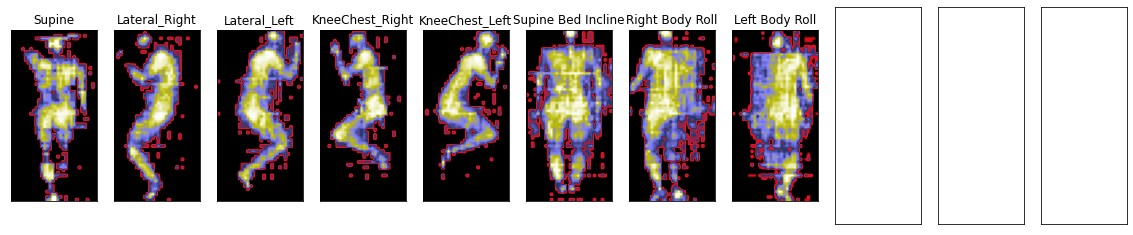

In [48]:
plot_samples(dataset, sample_indices, classes, torchvision.transforms.Compose([
        Normalize(),
        EqualizeHist(),
]))

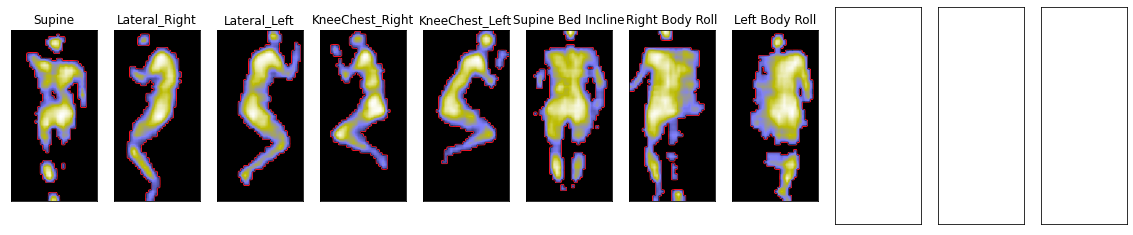

In [107]:
from utils.transforms import *
import utils.transforms as tf
import importlib
importlib.reload(tf)

basic_transforms = [
    Normalize(),
    EqualizeHist(),
    Blur((3, 3)),
    Threshold(lambda img: np.median(img[img > 0.0])),    
]

plot_samples(dataset, sample_indices, classes, transform = torchvision.transforms.Compose([
        *basic_transforms,
]))

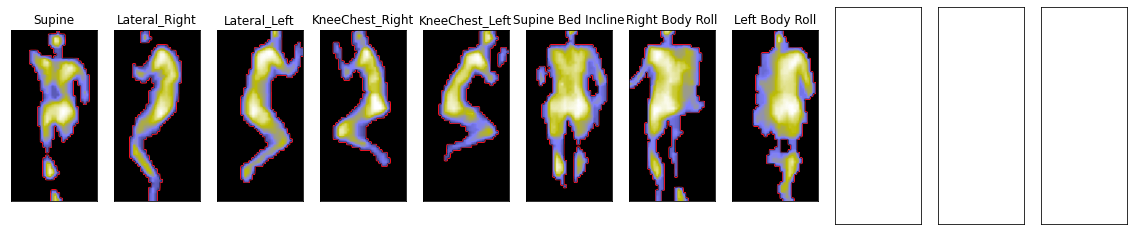

In [115]:
plot_samples(dataset, sample_indices, classes, transform = torchvision.transforms.Compose([
        *basic_transforms,
        Close((2,4), ktype=cv2.MORPH_CROSS, iterations=2),
        # Erode((2,2), ktype=cv2.MORPH_CROSS, iterations=2),
        #Close((3,3), ktype=cv2.MORPH_CROSS, iterations=2),
]))